In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [42]:
adult_data = pd.read_table('adult_data.txt',sep=',')
column = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain',
         'capital-loss','hours-per-week','native-country','salary']
adult_data.columns = column
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [43]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 15 columns):
age               296 non-null int64
workclass         296 non-null object
fnlwgt            296 non-null int64
education         296 non-null object
education-num     295 non-null float64
marital-status    295 non-null object
occupation        295 non-null object
relationship      295 non-null object
race              295 non-null object
sex               295 non-null object
capital-gain      295 non-null float64
capital-loss      295 non-null float64
hours-per-week    295 non-null float64
native-country    295 non-null object
salary            295 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 34.8+ KB


## ？？？单因素分析
每个图加上标题，坐标，并说明图所表示的意义。

In [46]:
adult_data.describe()

c:\program files\anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,296.000000,296.000000,295.000000,295.000000,295.000000,295.000000
mean,38.550676,192095.824324,10.186441,669.132203,111.359322,40.338983
std,13.528531,108491.552191,2.671814,3053.586986,441.340791,11.730839
min,17.000000,21174.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,116370.250000,NaN,NaN,NaN,NaN
50%,37.000000,181976.500000,NaN,NaN,NaN,NaN
75%,47.250000,246326.500000,NaN,NaN,NaN,NaN
max,90.000000,635913.000000,16.000000,34095.000000,2206.000000,98.000000


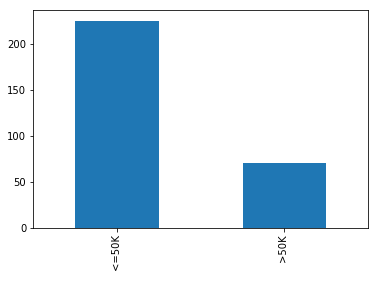

In [52]:
adult_data.salary.value_counts().plot(kind='bar')

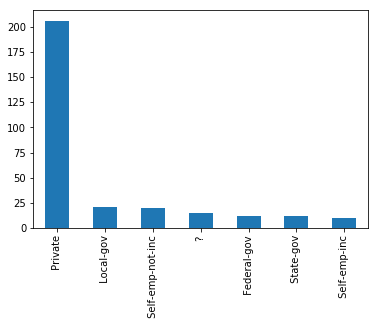

In [53]:
adult_data.workclass.value_counts().plot(kind='bar')

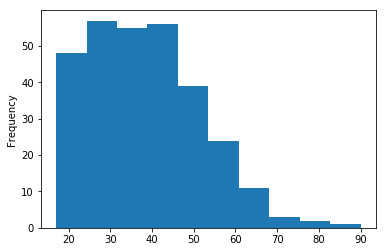

In [57]:
adult_data.age.plot(kind='hist')

## ？？？ 多因素

In [117]:
#统计个数
adult_data.groupby(['sex'])['salary'].value_counts()

sex      salary
 Female   <=50K     84
          >50K      13
 Male     <=50K    141
          >50K      57
Name: salary, dtype: int64

In [67]:
#展开成二维表
adult_data.groupby(['sex'])['salary'].value_counts().unstack()

salary,<=50K,>50K
sex,,
Female,84,13
Male,141,57


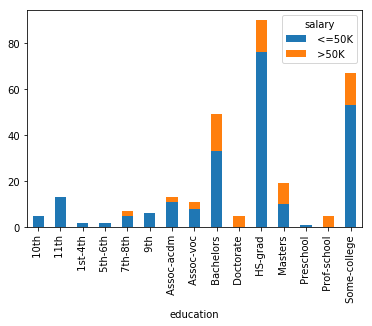

In [115]:
adult_data.groupby(['education'])['salary'].value_counts().unstack().plot(kind='bar', stacked=True)

sex
 Female    [Axes(0.125,0.125;0.775x0.755)]
 Male      [Axes(0.125,0.125;0.775x0.755)]
Name: age, dtype: object

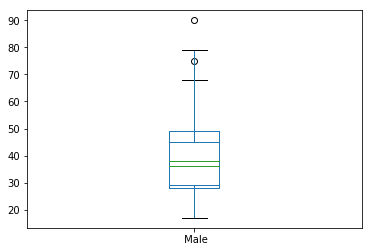

In [82]:
adult_data.groupby(['sex'])['age'].plot(kind='box')

In [87]:
import seaborn as sns

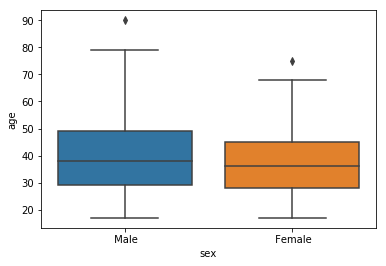

In [91]:
sns.boxplot(x='sex', y='age', data=adult_data)

In [104]:
#sns.boxplot(x='salary', y='age', data=adult_data)

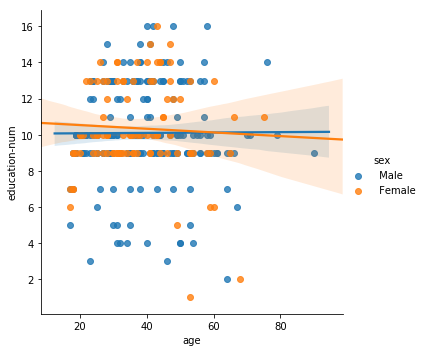

In [98]:
sns.lmplot(x='age', y='education-num', data=adult_data, hue='sex')

### ？？？分析连续变量之间的相关性

In [109]:
#连续变量之间的相关性
#correlation
a = adult_data.age
b = adult_data.fnlwgt
np.corrcoef(a, b)

array([[ 1.        , -0.08400275],
       [-0.08400275,  1.        ]])

## 划分数据集

In [ ]:
from sklearn.model_selection import train_test_split


## 搭建分类模型
逻辑回归，随机森林